In [ ]:
"""
(1–2 members) Another game.  There are two players, A and B.  At the beginningof the game, 
each starts with 4 coins, and there are 2 coins in the pot.  A goes first,then B, then A,. . . .  
During a particular player’s turn, the player tosses a 6-sideddie.  If the player rolls a:
•1, then the player does nothing.
•2:  then the player takes all coins in the pot.
•3:  then the player takes half of the coins in the pot (rounded down).
•4,5,6:  then the player puts a coin in the pot.

A player 
loses (and the game is over) if they are unable to perform the task (i.e.,if they have 0 coins and
need to place one in the pot).  We define a cycle as A andthen B completing their turns.
The exception is if a player goes out;  that is the
4final cycle (but it still counts as the last cycle).

We are trying to determine 
theexpected number (and maybe even the distribution) of cycles the game will lastfor.
I’m guessing that you can use “first-step” analysis to get the expected value.Simulation seems
the easiest thing to do to get the entire distribution.

"""

In [327]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
random.seed(998877)

In [328]:
class DiceGame:

    def __init__(self):
        self.player_a = 4
        self.player_b = 4
        self.pot = 2
        self.cycles = 0
        self.first = None
        self.players = {'a':self.player_a,
                        'b':self.player_b}
        self.current_player = 'a'
    
    def __roll(self):
        return random.randrange(6) + 1
    
    def play_game(self): 
        while True:
            if self.current_player == 'a':
                self.cycles +=1
            outcome = self.__roll()
            if self.cycles == 1:
                self.first = outcome

            if outcome == 1:
                continue
            elif outcome == 2:
                self.players[self.current_player] += self.pot
                self.pot = 0
            elif outcome == 3:
                half_pot = self.pot // 2
                self.players[self.current_player] += half_pot
                self.pot -= half_pot
            else:
                if self.players[self.current_player] == 0:
                    break
                self.players[self.current_player] -= 1
                self.pot += 1
            
            self.current_player = 'a' if self.current_player == 'b' else 'b'

In [329]:
game = DiceGame()
game.play_game()
game.cycles

36

In [330]:
def simulate_n_games(n=1000, plot=True):
    number_of_cycles = []
    for i in range(n):
        game = DiceGame()
        game.play_game()
        number_of_cycles.append(game.cycles)
    
    #plt.hist(number_of_cycles, bins=len(set(number_of_cycles)))
    
    mean_cycles = np.mean(number_of_cycles)
    std_cycles = np.std(number_of_cycles)
    
    if plot:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        ax.hist(number_of_cycles, bins = len(set(number_of_cycles)), color='orange', alpha=.5);
        ax.set_title(str(n) + " Simulations of Dice Game");
        plt.grid(True, alpha=.5)
        #ax.set_xticks([0,25,50,75,100])
        ax.set_xlabel('Cycles');
        ax.set_ylabel('Frequency');
        plt.axvline(mean_cycles, color='red', ls='--', lw='3')
        #plt.axvline(mean_cycles+std_cycles, color='orange', ls='-', lw='1')
        #plt.axvline(mean_cycles-std_cycles, color='orange', ls='-', lw='1')
        plt.show();
        print("Mean # of cycles per game: " + str(round(mean_cycles,2)))
    return mean_cycles

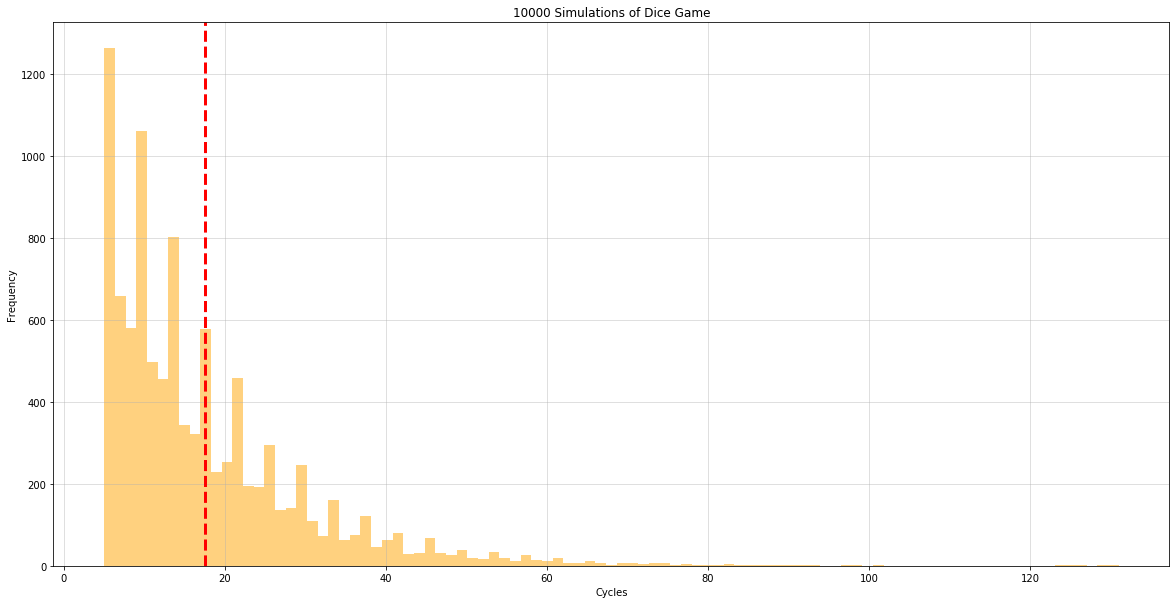

Mean # of cycles per game: 17.52


In [331]:
_ = simulate_n_games(10000)

In [332]:
def get_mean_cycles_k_times(k=1000, n=100):
    means = []
    for i in range(k):
        means.append(simulate_n_games(n, plot=False))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.hist(means, color='darkorchid', alpha=.5, bins=min(k//10,50));
    ax.set_title("Average # of Cycles for " + str(k) + " Simulations of " + str(n) + " Games");
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    plt.xlim((mean_of_means-3*std_of_means, mean_of_means+3*std_of_means))
    plt.axvline(mean_of_means, color='red', ls='--', lw='3')
    plt.grid(True, alpha=.5)
        

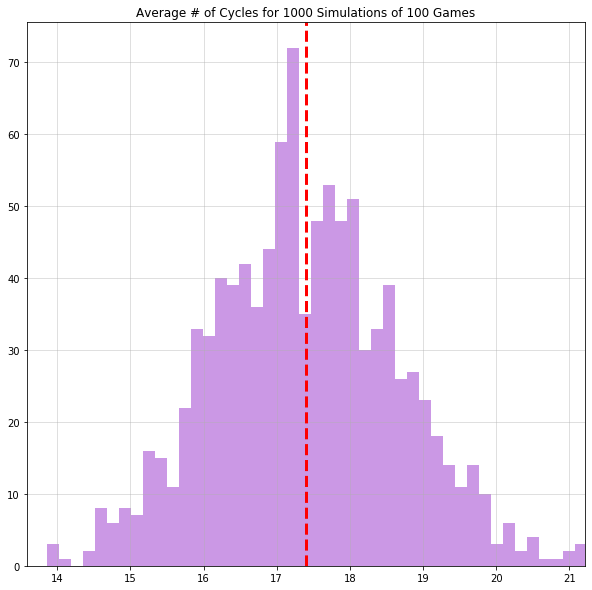

In [333]:
get_mean_cycles_k_times()

In [ ]:
"""
who goes first?
change rules slightly
how much math notation? how "statistically rigorous"
"""